In [1]:
import subprocess
import shlex
import re

import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import combine_pvalues
from IPython.display import display, Markdown
from tqdm import tqdm

In [2]:
RANDOMNESS_PATTERN = re.compile(r"exceed this value (\d+\.\d+) percent")

CC_PATTERN = re.compile(r"(?<!^)(?=[A-Z])")

# ENT - pseudorandom number sequence test

In [3]:
def test_randomness_ent(
    mode, seeds=[42], limit='1GB',
):
    outputs = []
    
    for seed in tqdm(seeds):
        generator = subprocess.Popen(shlex.split(
            f"cargo run --release --quiet -- --seed {seed} --limit {limit} {CC_PATTERN.sub('-', mode).lower()}"
        ), stdout=subprocess.PIPE)
        ent = subprocess.run(
            shlex.split("./ent"), stdin=generator.stdout,
            check=True, capture_output=True, text=True
        )

        match = RANDOMNESS_PATTERN.search(ent.stdout)
        
        if match is not None:
            pvalue = float(RANDOMNESS_PATTERN.search(ent.stdout).group(1)) / 100.0

            outputs.append((pvalue, ent.stdout))
    
    gof_statistic, gof_pvalue = combine_pvalues([pvalue for pvalue, output in outputs])

    if gof_pvalue <= 0.01 or gof_pvalue >= 0.99:
        display(Markdown(f"## <span style='color:purple'><u>{mode}</u></span>"))
    elif gof_pvalue <= 0.05 or gof_pvalue >= 0.95:
        display(Markdown(f"## <span style='color:red'><u>{mode}</u></span>"))
    elif gof_pvalue <= 0.1 or gof_pvalue >= 0.9:
        display(Markdown(f"## <span style='color:orange'>*{mode}*</span>"))
    else:
        display(Markdown(f"## <span style='color:green'>{mode}</span>"))
        
    most_suspect = None
    
    for (pvalue, output) in outputs:
        suspicion = 1 - min(pvalue, 1 - pvalue)
        
        if (most_suspect is None) or (suspicion > most_suspect[0]):
            most_suspect = (suspicion, output)
        
    display(Markdown("#### Fisher’s combined Chi-squared:"))
    display(Markdown(f"* p-value: {gof_pvalue}\n* statistic: {gof_statistic}"))
    
    plt.title("Distribution of p-values")
    plt.xlabel("p")
    plt.ylabel("pdf")
    plt.hist([pvalue for pvalue, output in outputs], density=True)
    plt.show()

    display(Markdown("#### Test output (most suspect):"))
    display(Markdown(">" + most_suspect[1].replace('\n', '\n>')))

    display(Markdown("#### Parameters:"))
    display(Markdown(f"* seeds: {seeds}\n* limit: {limit}"))

100%|██████████| 1000/1000 [20:11<00:00,  1.21s/it]


## <span style='color:orange'>*Monolithic*</span>

#### Fisher’s combined Chi-squared:

* p-value: 0.9160863695413092
* statistic: 1913.3843635793696

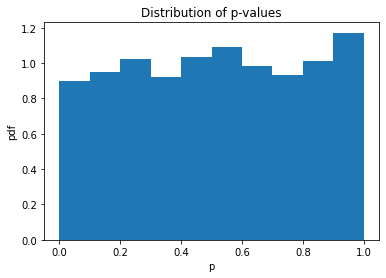

#### Test output (most suspect):

>Entropy = 7.999987 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 180.30, and randomly
>would exceed this value 99.99 percent of the times.
>
>Arithmetic mean value of data bytes is 127.5441 (127.5 = random).
>Monte Carlo value for Pi is 3.139028456 (error 0.08 percent).
>Serial correlation coefficient is 0.000140 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [ 6195670548662213476  2500544197847111819  8655362575978027970
 15189951541971981564  7922767220139408786  5530575116778590232
  6290717792112875088  1906341200687326305  3890142240066590801
  5380767409602816212 11020916799965676668  9166363911775664079
 16215491474984273739  9851413308354873524 17978711681486013434
 11180651024364968439  6103875044555405136  5622178484614183989
  8032566454655471115 13065899286993244546 17659654918877228091
  4844165635794985739  1217224029406315493  5324726826727861670
  5273509012262449137  1445627496058157340  2356350301154739189
 10191326344358361103 16641017268947505437 14575387939003204610
 17986406742683314379  6634335785590602916 16893805242757594110
  1848343536830244201 15747205973061016613  1074995489248936587
 16715055841745325723 15405202264302925348 15800691030184872165
 11645907402078611879 15253801379147910531 17267179549018858544
  6549360714432073623 16780510287157960391 13469786709404033436
 16618702616840982959  5396447540245853797  7863267911815200495
 15340029494739236161  3384026325364068821  5346484105374865244
 10798988680849090998 18092904325142568617 12963707683637311828
 16837373240660011578 18385372183867227963  2453634197089381848
  3709335209314771035   978268043821601362 11860649871859627000
  3487667137529763089 13564262478750387419 12222293967018034741
  7894718016573091552  5311992974557358101  8266811409766084304
 16044470047741861415 16727521422045502642  9917616212219763659
 14934491804465626392  6312406039035010726  1901506230829252497
  8471116760357660195  3677567816544817926  7395696337769390754
 18034618178692195415  9399031877870161754  4012582102869055481
  9633628050316283165  4787240569997467938 15447711214647936119
  9315199428255830288  5386924369966059041 13507043877028822767
  5532253030699654546 16376436637054410459 12652733187165165019
 10148675870734718249 17829657462929508769  1083971568760002547
  6425739763403886754 14673311346518098250  1178242648217471637
  1695582427400119292 17533159085573295017  8147726088357336195
  6060714351032415865 14267284002236727899   975910343469387544
 14939531348157475921  7147342553435799528 18287577550671620833
  7894944560399877345  8057963715238493563  1182766329786423129
  7829808745317490716 11988898206984504663  4589870175881088218
 14054234457737461579  5049638205222283364  9227154016280430217
 11081294501425345510 11030395090981543430  2804546478627528488
 12302057019054887850 17920029587115118417 10472255782056947478
 16911058311412030798  6907999083019415327  2307495426326623190
  4596008166049447088  2327515897682362489  9021170350983016600
 12714037173139309067  8554990094265315330 13125770950027669716
 15143357637394473221  8655237320107302556  7919608952584944893
 15145111298781349197 11659759576472741972 11747603398637678886
  9358635361380198934 13705302389607456323  7121663923433764853
 12745082803295183194 14721284071435376802 17203084074308509999
  8966556091640697004 14632281485563615237 17066001815136472110
  5025325952665786750 16649202684378027005   729694076874323497
  1884077126899549687  7960325391031639414  5704165266653803975
  6537639067030355332  8418169741759283033 12530340973669846401
 14940147633707032401  3495463168869147370  1824802317950892380
 14276890580149733627  9335774403576434064  6898568678448737906
  5644205625868603353  5382560433076128685  8601334797315197069
 11133771554524282295  1948622262188694227  8891067093291300846
 11101545982509180243 14476855633252666881  9637099243569275561
  1047099263562253078  5161143449187241277  3633780119374218403
 10718303032139834684  4344026820888901197 13903750008931573793
  8669682665735158497 15990560870610274130  1791970031066111608
 13196645744103304893 16244952246025007905 13739552214486422152
 18363320447249355140  3127611896212342288  8968309139642380626
 11263812145287311571  8384664850777412500 17193974640837247567
  2606615832993107915 10935026360647011096  2269213985276654579
  6589484777809655527  7751609373431246339  8772253263368527597
 17804748852557878817  4894963832120009735  4400317475405441183
 15346894758203666515  7600258506123514896  3995768186159623955
 15856398235873210900  7659510202330432531  1230315866175900929
  5179847193538194295 12143817909150285196  2130978458629040406
  7515850903937974317  5222551198402292941  5870364663670250329
  5957259700981945830 11049771182160002972 10385207906398636237
 10836523011001050365  3665777327932343795 14695722649900923151
 13160629787297897687 11463697748290819656  8735834484123960300
  9050918525461984985  1586710658887897891  6294097837136725171
  1819149368567510914  2825270452636849353  1436577783952618470
   651095922559148031  6969420585425104760 17009873239494357931
  7080830555439012665   931509988306072576   210064446752933076
  5136804588763607925  4943441676772453102  7480037383385636469
 11805909842913634742 15427022669152576158  7201645276319559220
  8926948425971730570  8467657366338397144  7059992200025401162
 17672168726341792147 14711524991927394598  9820829576127156921
 12064878430591745839 14018174604938418664  4159850463697140604
 16228561967062292140 17158192781886931729  7236982062494536120
 18231095206785442119 15715164961692864054 14201945400464466392
   905224541696352915  2770638412167320204 13349227765473924288
  2983273388047954827   859175739507047458  3208280659828199198
  1028363615300471439 10654669691544146535  5606372554986786228
 15258057283811190956 15151145306846402397  2018842024511003643
 13679240016238194498  7203020240485652288 12206102461848629021
  7822287383396536044 13996396708584782161  3494638728383000230
   426704153699244966 14066927996175086823   232301132552036511
 13503491403527340103 15115099824475755530  2747229996014532493
  8664465429443772381  1387698704214691140    70113837575381852
  1870355956623810051 12639490276621803935 17781707280636946591
  6305933105564706709 13872162498531439560  6989328953024181380
  9988164066681609961 12660287885279589889  1142378109374484322
 17947988675789570810  7953815516570504050  2625299451906339666
  3325731316712028510 11349479662571635352  1563324379003607547
 16741691629283295543 12269487011302430290 14752578354630797560
  6979483092316603454  6451947887714923684 10287631506094604257
 16222709568514066539  2496206938935825323 10193724177585530524
 12252439143445792188 14078847830209971741 15225333308227551443
  9806792125500187816  1098028628659207651 15923888731235428275
 11565835294221952645  9479973409645129108  1187561531811368113
 18334453566546198853  2987531545822268093 11639429601169367921
  2678421155300621852  9455676258584125966  4034276212660894147
 16816482475724318250  1906906502367548131  2700280027163479530
  8780180273862927229 12443145009544782788  5912272160059252313
   577264589698869510 15524616250289086822  4630982411550628893
 14260046106559057558  5493246836720808415 13815172760067559949
  6585859579988979682  8656682160472713347  3978044255336830229
  6811582681517575653 12367500013691876183 11184884027411610229
 11579457302192891312 11426663156991121383 15082217809481375382
 12056099688825262220 17464299567562785511  6725023855827764171
 14531584095034268244 13199858795669749295  5859985784241340274
  6163003831417174528 13595101643724587971 18098278720041664162
  7948680351124350985    12581647170419255  3895891236136373056
  4360385155751836375  5497380475898424447  4109508095088699574
  9186976105903802952  9281374930944664613   446184945612620663
 10912599251498570464  1251336626245845115  2273338220330377433
 15266550039424645582 11570368013669723230 12157392619765064085
  3115902645170031718 12031341166509421418 10093356241630899107
 17953370927457445580  7137963804204420164  1940391076428252349
  5753295562365149240  2865130883323966861 16497595088049276444
  3865883190042732122 13923943134022984820 13860637438893991278
  3943913188605083317 15805252811703931670   898031154026181752
 16797313827416818514  3595575992461644044 14621440337707856783
  8655489924042551180 14132313506332786860  6064910951968337808
  7018817550560124453 11460012902790019427  8315520988277694369
  6651360827747710252  2083864158555648119 17760987353932562409
 13608626439019214969  4346941448014274566  5319338248460800343
 17016871519416029868  1251641736671592961  8233673978369211320
  7071560520642236603   166405586187349193  3068897692321656822
  1452963042523752378 15374620803074345473  4405345054104683413
 15606326007853484165 17641893504773521710  2697300782690635213
 12611098977798981861 15319291764733696610  1348034488343532267
 12429580669985888400 14959421740775755264 11190703039643249418
 13734805846226008479  4216079796863501408  4259741041406420068
 14922601195861461424 12283720561174840287  2319651146102326025
  7907853134857225317  8333375542022112041 15520930719227647896
 17925983527273033540 17784177543515913696 17909593173834293910
 17913634217658033016  6713693909592085563  4812652407639033351
 15512257693199169999   632875516992464868 13494449237098355337
   218669321473170505  1701849038637697396 18010635035162749931
  7789958083419211700 11733349352664639942  3386705872412155537
  8355983858798733323 10278623394020503223 14723047523564464188
 15356593098263146259 13860876439165399962 11334813402671220556
  5364934796790319381 11605095892302070494  4248954370235182233
 11122933621056488110  2392010001198399115 16417721282036936654
 16590065022953630680 17037425549550683811 17952874664592501290
  1592506371446590305   513957515432229891  4689060416809641917
 17558776186655139735 16586280688885571663  9174755394715742320
  3895474992518879252  1668166058601546060 14226466535780617059
  1920928780463722726 15633591698686006661 15220510496736515373
  4421614666215515404 16198167418302298974 17270352349570263866
  2130137932751739672 12067864248571123419  8397133613638192053
 12849926998147029949  2554043961329742656  6098513223070574089
  5072276298739895682 16943973387895829533   808435559735599846
  9006155654469092581  8758741806008056203 16126605693204860011
  2603619104334555139 12784670547250733322  3065169826138037466
 10757488341037853847  8535856250740807423 11709194436778529262
  1001660360997500975    96817335024573638 11882415888240926418
  9226701441854949859  3392554565500743577 15188058447539013993
  2993344287226148107 10963577057929533034 12147369996360597871
 15755423698913944211 18002692791407115977 17052296348114486782
 13720398971993708616  8777351768154692895  9560496661089395612
 18149918219030530184  5902738065900599394  1997130142266150571
   583225355425254696  3214965478809535293 12140427925122404354
  6913179213945982204  6153577718265359661  3414395143672807952
 10063178182404218203 13677678209982183445  2272451490148622623
 15113154697255198330  1202879931573152562  1194826329627554699
  1919422439820092246 11599231389780855915 11105672990532262815
 17743704862407025153  9646598739539007767  7221310844015311289
  5083504708267158680  2006272925691245863  1277503382396376606
  8913948376867666150  4471215429668159584  3219006751669082963
 12058915819847646870 12466524529853207302 15482587990857375634
 17824782574511029637 16270663865868186991   629027658632832526
 14432578238706812534 15808149442664818431  9927960469511565336
  8908028350066327976  1474794760971872168   341259912296496930
 15190199907188902289  9102269345273653649 14940774482367360830
  7132801054361241887  5343781269348479328   184091395459074520
 11436424543871035308 12174545212587850254 16116949430092703473
 10895431936026998403 15851861035606891164 12163456144028271134
  2118695931196686871 11796388242969287460 14813336525568710396
 11641432572402136604  7458519402565911495 17997395203785247681
 15153232388981873448  6218447581855636533  5720571807142609708
   299446908962159780 10730474369431194830  5490971577208116853
 12821530068230139854 13370369910311769440 17977702401648770253
 13844187259611380945   866085833901833901 14473093255530379322
 10704734421704247967  5819059485713377722  3401114790856957345
 11562470713876574149  7546693156309052136 13041387455612079439
 14219626500991378496  4880705399611868917  2763202299742991934
  6329503266919262641  9967549976656771612    77560224624522160
  7644359238141137251  4924189858373016097 12317831205658691921
  8487199394979971025  4736267075485636558 10408926013055882439
 17215014566524641119 14334878045214075625  7593212021118388452
  5439155277388531259  5430401166723858818  1350777120881360813
 14946861435830944962 14330434098407695397  6224014555649707020
 17898738306511497979 12143927880709487799 16133125306968967862
 10067259703689581400 14988412500421231434 14468057742842985729
  8881924736031518228  3372947518869051642  5575036807468694162
  4751748523263008325 11232314048690459295  6208498431081438050
  2468401042077134264 16061163746435328671  9039516685592512300
  5489615461448530578  2376651288029918383  2731472352508176144
 10330050510683534318 12573846507486590867 16188546587015669973
  1570680843358879201  8049213693052020486 17485803050496187012
  2864829767204695539  5805257616649659896  9843418462687782640
 15446804373429924437 13435360626528879207 17593477639667744972
  7605491207127147114  3516343055984204219  8697516323677327255
  1449879621347943541  9490792596323910047 16082722336568165926
 10373173697987694737   167896244069130838  4576736412761320567
 12444783837244144159 12362075483966551851  2296517441382687091
 14662701829610860565 12354543622250232598  4247924572535218673
 13123110845629753410  1454916958372349015  4477480872188336982
  2387443116468118927  4608608628158562112 11102157485842216337
  6936894539650932052 17703584808673579251  6399638095214666747
  2331372823631195812 12354367548289366811    20142495477124825
 12913015017243767185  2224127970057160727 12865198930978572924
  4995061845039682331  6814467428867024737 16421627972012152672
  1722071559020151247  1496694677635202549  3931944430071866374
  2853521880888415393  4770257651677767614  7384295841491548991
 16255840843586219269  2534741581879106663  5972555964735575869
  2282769977536248902 13556361593365439700 10371538249001555321
 14479447810800848888  2983024052293484174  3507519296446532099
  1316440425324705169 16510398112993893594  3079793677497994486
 17636532317180392942  2918089309709496836  8739461368121305731
  3581617484009487327   411743370104892948  7226392782247616339
  3111578042404165936 17016767595960044926  9556204874139011427
 15446584300973451536  7944396356544092595   210578251415566445
 10504443573182873155 18228208803470547624 15808522729666165650
  9553717625967647400  3142787283809761088  6332263830517445673
   231268707291735644  3217047371621121140 11571317664942770526
  2801617038799894173  6227652035401185254 16430329278040254812
  5279681332749530312 11898906787932584827 11034145665152043045
  5107856972177774675  5947813631150231414  6257494884536642761
 10485037686735320680  2221854288856667267  2187286464729400600
 12723267364070533153 11504695365466969832  3217489400155783067
 10832450667383484578 16889892783991779309 14072166345454617750
 11251918782541610917    78631054121669159  5579600991064770664
 12110883222617662896  3693237817737785598  9706366259526622447
  4529929297017274153 14345303467498207649  8538592452551318503
 17816747471828536698  5261599030056952265 10295401495979419628
  1226187442944006546 14545813831041819463  5753552019762804172
  9597984785220665844 15629482792644577726 14329376523001443598
  3897685205583494608  2172082149526274452   923850944474008318
  5413601179208654949  3650327229154517098 16008568888835952891
 14229820929710991560  7521421645737114187  7157841218984716223
   652937348356809933  4351966175910473537  7968005621784226254
 18362147294566908282 12296136291954715227 11101175485531717171
  8977775191192681421   119893882676725937 18096742875602281261
  6859427593067713899  4774044132826304934  3569484113150684997
 11465800165890746577  5238274759399240305  8222921028402464902
 14729629801081061401  7273327070751968268 10308692630976893329
  1735023586026257306  7609244669793447765   433290861561708057
 13274145396027594867 12229185253772913068 15712218761487644573
 13371572113240155792 12133252406235678091  2594142989289597617
 12930624772336845268  2518071425677921128 12429792704489291563
  9588690543512876321  4327627925904321813 15499974659872913242
 13830399642984812112 18276393347847368848 17252652560698281140
 16330540636831700912  6258185541093755261  3495427520291393756
  3807971709447275592 17428734712832909552 17156662693700751699
 12964941968831699932 16166126240174678641 12764043721597234339
  5957515247181414087   575283132960753456 15098144141260900548
  4540640149185287723  4056788050559536567  2941970114217256408
  9882957991084502946 10158704675018426925 12344735087069462952
  4557051193448367375 12759461025327839403 16463656308468578459
 15281210025826596934 15254989703715186109    65327776696845018
 10651902100779946940 10673164168315324877 11738745997261470274
 12641598993996574059  3085942247645282564 12614153609207584573
 11419414617561467077  7474605531175995222  8724036025425000622
   154743863936502872  5250006227721351501  5230652828326874098
 15277666979102258555 13147087886059594272  2352692487723194605
 17734003062366881820 14276504886895079917   102210150472027950
 18061589328021821362 11126014426285150265 10912862898831778951
 16252659501475462340 17783157984580371403  5983011862417558950
   875228820996566875 13559610521494619113 16705107931416885543
 14141316494299224068  4615320446951212064  1245024703664693998
  3037562924774445848 16022541560859362062  3523024685102071621
  6692878046140431145  5936512494802439567  1840083246390222102
 12651298915840980079  8524190283286051503  1555696124277777527
 17469133262131606924  7196707473329265488 12913720594560714407
 11839324719526193781  2149663280316021130 11509484975443106945
   753926349019978097  6075031300619660695 14973431882924108393
  9598684087354288133  8748448755373499845  7789388043062358535
 12719257217091566642  9176803039879349523  1339948889343825528
 16126376304222081822 13334881594029757360  5352703424562425523
   711570845802347108 13043596276557419931 12904848756041662564
  6190856483805826923 13975019709776745446 12840670130222167825
 11749349524592119692 18417744087020716169 14214062067785207339
 10489360741858400838 13054864729200704916 16865446280839285723
 12697091156646952800  4878105872730175843  8873968164846707282
 14406116068990636835  2013616095257683182  1638097352013133194
  2545724743752817339  8457743739680266437 16958466766268725490
 17658210627995040646  7156284835887544567 16425318284052309933
   354836640091264127  5301878374404840473  1668512226448601620
  5846488173171204383 18385633131762259360  2820719059052147482
  9612476071592944373 16732925751983440475 17441962144513409522
 10731726293118803748  4217269517218982999  9856288670476838393
 15149371673110089418 14726985236723856769 11395814113434073603
  6514717503922740910  3368757031127267702  7051631127830884264
 12500553985651899455 17584737282760049379  7689416211337792731
  9053280134602924490  2971603473245175405 14257347819511975027
 10418735238105477749 15829205244189897426 15217937622669889007
 11240536811405571519  9483458704750827711  8744086856296966394
 16004216910212365088 18385057096190534208 17135566886567608699
 11318771538453920745 15266975657429410596 14767893586643428264
  9200784892718207643  8110379350977655188  8317216701959296989
 15738178110473136413  6423318635019768962  3153267945310228797
  7953664623636519647 14099667029514903861 10756453125562553916
  7501822384684026037 10723690250650467374  9434424267634775998
  8067505329663580120 12718152591757366940 17677123726443866468
  5680499477976325688 13983310527698861602  2567759733154664787
  1533511112662683762  2143484544360162881  6409630083375511040
 10726845903760391724 14594088078945529479  1004924661789869512
  6811957344079120221 13832332242101868575 12013014176259920354
 15519010844276563127  6058867236747104022 18010122642191984156
  8428629627132636416 15953912114486921091  6609769218221420687
 13031787284207410227  5409088276117753463  5574330362935826976
  5633947631245177440 15185644108727918537  5395432202334970138
 10890059514871395558 10897029092405211116 17984132411255924888
 16009339662054548485  1125016504254544792 10318439941539058127
 13957086659858609227 10689295049015709930 18015832637133316517
  4485287273249626838  6286587103718623556 12439891246332375162
  5701272369407569809 14666037465951016219  8747421810576468438
 15482052303622524129 13339134417862595672  9455622923046500963
  2257241543604849347  2525052781188113558 16716670945790712190
  3559832603063737241   478794540335417863  2148449349298846223
  7895197267194609426 11315694864811187519  9328937009670790519
  4611781857752842306 15577997938174758463 13895115275232852441
  8758257550654208242 13267183200966100306 13978031468858115512
 11305604622810354154  2982953167648734175  2441538334573164700
 18027944443131867735  4395704549600900906  9641598708979092693
  5952081946279847005 15931300604247200626  8613025558615555254
  6505856115293881256  4333388839949110784 14235515210284945385
  9485567391623597806 15293397240748011082  4233466100053266728
 17770976603538743573]
* limit: 10MB

100%|██████████| 1000/1000 [21:42<00:00,  1.30s/it]


## <span style='color:red'><u>Independent</u></span>

#### Fisher’s combined Chi-squared:

* p-value: 0.9621179160622692
* statistic: 1889.1354655645869

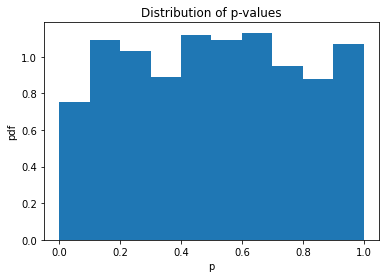

#### Test output (most suspect):

>Entropy = 7.999987 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 184.92, and randomly
>would exceed this value 99.97 percent of the times.
>
>Arithmetic mean value of data bytes is 127.4934 (127.5 = random).
>Monte Carlo value for Pi is 3.141853257 (error 0.01 percent).
>Serial correlation coefficient is -0.000470 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [16243861456804293865 16140310892101750910  2301036187811105191
   178731840710961040 17109371930803329282 11234737336798291722
 12402938044093006818  7030595566898522787 10219268134993000807
 16541632339355929369  1192259226479196035 11535512994699684069
 17758368745793396690 10785918377702245115  2286876928275844381
 17223382342805534934 13813940860919332664 17362027173240666357
  8343249856809412181 15271964733474703990 16709953813381561814
  1629645518700592109  5277428351989648844  3824991400480621463
  9774346063586813752 10195586830443709170 12392128248783593294
  9689463674280503676 18034616861941508676  4476155985150193051
 10055485796950349659   941445314991959667 13556195608966505377
  5140467155739813778 18089659928485377671 16003414678073115847
  1989295115807643392  6072844398696629387  8094487805355185685
 11545333905948684747  7072850022037595581 18251156861023792627
  2341484682813037941  3462085375902658784 16512144136931505106
 16837395556378194233 17892094963667953707  9534933557155759735
 13363319007356148503   832368321779247303 12316526050221802352
 16355590682336516832 14905857230560400924 17467507620655766813
  5786900189705588964 17707159035551706169 11443689837273908202
  7642199329260573480  5137431597925260909   367786657477253609
 16421125233733249288  2888945065824319663  2899145273657422652
 13018305694040490141 14836003488488995385 11286462885734707625
  4308271686586009122  9173976093040711879 11584386595774718393
  1287680261302616557  8778645056607058349 13588300625894061358
 10298764624312651162  7873818881199522844  5195584683167022998
 14811345681028853000  2575899087840218055   875198326550373354
 12133872320368995249 10967401631466832703   106844472668116157
 17094404824337248259  3633559757002551292 15643138026631303179
 14761189956040293215  2697839087966492272  8391598079016949906
 16429337769394016059 13029531431636443665 14057324265176340623
 16016286380767416461 10658096057806892308 10987370825021288815
  5263059706410511657  5513110444787496266  2692823358567463190
 17738391612845932202 10607681158005614794 13907838052314814510
  1885574538778898672  4439304185951666761 14611403901966408153
  3257063303084294793 10406097909895725701  5979072420774877518
  6145587708080238211  9464472480831168024   866248491574585723
 17036285014159072811  6852502276764776101 14936426702937216670
 14458293990733273014  9100045117216117087 12383543764412204352
 13192430775255444462  9704749410713875497 14309201545572506909
  5594144235633621011    41928266201186439   591748442907713964
 12220466941592394167  1190054108816001273 14528467136197786000
 14882462108973606098 16695166272828002171  9599367019531531454
 11779670158523616424  4896994148694323890  2718982272676293707
  5770204514545062964 17068189624222282828  8098528458329643082
 15697390234581014886  6575271274548634216 13858905468333493313
 16430754507744878163  5940017574293233540  6995468700454886068
 10975904649106145979  2024831029137139115 16465115255608926024
  4726862699666611404  3121345348606254798 10157203934685606486
  9313189649636323802  1468617079392752538 14674654956722974546
 15734007482555965319 10629778721366176799 10579398143452783006
 12454142971692379020 10637363884770964288 13782930803996919976
  8349595862129133516  3535174868016378339  4154975263456140299
 17772446053204060637 16319967291792135517 13892243330624967127
 18076156819368549635  7328984784421645611  1451318594014122357
 14035654403012035494 18177894358590778053 12046079273033643458
 11301784325812201407   412626949875183956 10443725662534020141
 13216065773325302227 15152507781608874304  9314600470535444565
  7728860012981623718  7795106709323488676  6981323093388637501
  4849533709373622765 13817614046002820545 15881427232212231084
  6704187570515988938 18438023769932732666  2661104365726966725
  3736501342406000499 15665166285347795225 13135526401686692009
  8405866710793337573 16499262070843125507  9573320403161503299
 17474398362561551442 16148366588659598495 14949848135526340573
  8762870950815835239  8305589277690242003 12172186844923719690
  7942348830753909916  8249764369555900749  3051871891849833235
  7492732455139136304  5449585684161604933  2334625730947512674
  1095243023847310270 16407055294982377768 14508080434754416123
   718087798960138320  4540817532616874081 11396782603709251930
  2534405423424029431  5481998707904902734  2943234832427640899
 13577769026904272031  2264740425824637822 13688967274841219685
 14140569785982497424 10946519024059555753  7071064724476682131
 13028135468244969513  1706771761039211044 11126042665312858979
  1761194187122827634   655550486338293915  7669535411727588763
 17218632646767698043  2718228087122574279 17241012012443771357
  9822388752000663509  7156294571575991654 13556885403731910519
  5136635265826650481  3381374737470068438  7328136885892030316
   512733693548277723  6997566265361959358  9849605498948982464
 10289075626121783834 12262897877407099944 11756713527978425888
 12309701965999030910 16201630232488398131 16850471236567772827
 12044601657861633502 15131353858730691560 11611704952281136947
 16221177907246242665 10134847732327093987  9223199354472740035
 17508314585503452490 18401731775664184614  8051286342579626448
  3674458058697931495  6508592627055587333 13647885750642520751
  7140413052709500939  4642620803084662498  2359236283860343745
   153545609189106498  4811255402191238266 14456316650203158816
 11454902502442766491 13511458292481480079  4152966273231354712
  1518955112777497801 12854115207078068540   301460116565876072
 12125098093373108616  3727810897473163980 11671540160858579817
 14893510121803619172 17513637054567771955 16049250926136107116
  5718231083861026904  1625339984183578470  6416623823316561136
  8818847438033618795  5811771698836973823   431959316754681339
  7555311353082841676  1619758102023258291  3275587394631114458
  9622314646783921445  5947718128557790246  4461032247444715016
 16671398106720531002 15506398072553926516  5862743605796556930
 13424392561318129730  7279787740861869853  7950183027738618902
 12579454213557745351  9760014233879999702  8722520630297292223
  3071484343607006537 11873543304521348909 17659382768974699205
 12454558192396873366 17221674025101346524  7835146006311474011
 18126808161965025649  2190915595089482991  8786140244043400323
  4681026008735339952  5476454765947203476 12499738301282706646
  7494681748026700146 17947278233052139419 16323621294255482246
 13037951526370120860  8519789990627729293 13669200956871217235
 12453171388674312944 16917450930223053588  2537701242157538007
 14481884198019673242 15822341617723976356 18142479249914689958
  8485716098451731856  9360128206229873953   988427321087818125
  1327304966457638273 18259530592972864185  3077207844872097817
 16139262087068150700 12701803781845681732  7113019286233179120
  8874287702884976725  7750509403040217691  9978514562413182277
 17880681246616156012  6855030262869807387 10464504102060379633
  4513633518696104970 12105832204475049735  2755107395218577826
 10120275378694006477  5059401578315523948  2309017402815542581
    98031934355092899  5430397016767722658 16103476608720935802
  6309054257337145105 18111487937444086778 16365943486435096432
 11765430528224647666 13294866917978259612  5887951855855790426
 14170602511493106276  5423755774830244193 13254240814827089815
  6095077653175042962 17612049583810385898 11639086057074652959
 15672407230119314601  4569686701995968074  1531009372236704668
 17796734088801153306  8221683190172290930 15502288168362650463
  1465614848645842843 18007196408649612066 14776319896684055366
   722320749618076964  1345438672083304648  3526797804073910980
  6367209977543295903  5035537544896391217   792780967914508291
  7390245638353088288 17209257700023779224  3821914487747545251
  8710037691961174732  3283060332243401306  2135640022237710804
  6559834362912163498  7562428045270669288 17316866651676689245
  8666940198288633225 11397563749307473554 12414865622228051060
 16824302892406645126 13790796210871010354  1848574973483397436
  3914300981458428692  1980355805430575968  7931337120383326294
 16740190550076743668 16630547312858892450 10537799262974539481
  9967635399082216423 17869867726740812792 16372656151124032131
  8987174908907224365 18182664991637422776  6604788523760200015
 17410114636386851192  2030487454391997410 11871202898913730197
 11603160864592503351 13849452994090175956  9777175944202966986
  7139719590243456828 13158600000750812414 10676148522733159286
 15743336531302387505  8313032776293872599  9565322788252854817
 14313697198984620659 11331391226642013923 11806290883533497965
 16220798468450657589 11680151540866210112 12764464649473702518
  2550461633628013979  2888981046362205952  8353755568630912390
 15992479443899549741  2586264654873492296  1391965479163577872
  7850290668292891008  8915959120269333458 13688188356707350321
 13796019102486408818 17141349336719142089  5267461379758315779
 13408893938822150966 13069136537775406154 16195643073035877870
  2266725365379541230 10756951555678944751  6648243876920217667
 16724075483278169493  7090287869380779269   432365110964185708
  3517434795455021182  3441922425643962925  2297790058829946846
  9208380215549383400  5077065184880990889  8562830389754856090
 16981247399041835832  6294035448637548825 11797555121850248527
 17521068910979826387 13192886638841935366  3789097861633115044
 15634370586468090393 10287397503638693612  6952578021091760015
  2057829253729263813 14375160214247025780 11641493606337558947
  1765637976276414706 17754824340726728208  1095819727175421208
  7574241883954082168  5151968492208369708  8030630384782310913
 16274017015413094751  8423578028432310197 14751858247804275811
  9688119847305468419 11442493369784790593  1970952541718448337
  9773082366044252472  9800895505593185344 16753056065597043227
  4634585441342328999  9906432800154203861 13180042171115625865
  6130147299293516096   637231411145548413 16208117568951415092
 10022965336859281227 16623608720359231072  5518460912440880168
  4206843995720336631 16075744605472165590  8672759914616398767
   699429198658007400   339667858730151382  2134106032637275933
 11407351347490532732 17734756089058658643 12516466022966567707
 10508641583151176882 12039667651634406256  6048473594505174613
 15564261610818257961 11100769887386364822 12239477251839037647
 16276003025201014740  4646384781260905884 17897441509002248059
   300091021652203954 11564430482663143877  5010368771054583139
  9185066254322745772 15771788189494840172  8616660916646563183
  1829483955691124855 12685228582354293933 12793230123121304851
 14319047506475125836 11245056028610791327  5507925041110582218
  5408244291683097327 13196100163653958505  9962280047254120145
 12397483146671760638  4727522148673562545  5390949540610844892
 15704193808461059653 10831503273289125811  2830124913283687629
  5885910296538507698 14241328959643842755 11568356936592244518
 10463581195612648753 15309103606094046789 14463641554583468736
  9876268593938517875 17825605839079835909  9163195899791567855
  2401057924639037353   286945855162287098 12600894028995907727
 16236683671472154332   394430687965704140  2395328602117465474
  9273283845829124778 17275653593530462019  7177609109745451052
 11109690128349997877  6162281109006683980  9667879798873662226
 18047846265503197158  4194456312970538611 15805112563907566346
  4307663824349260979 17191278320986077267 11199703850026655317
   431694507613191217 17344367222244963482  8949731249055441703
  9974182927354728365   411893513465648521 13846099129118204018
 13402731304281158385  6622433316903103756  4184693806048155887
 11003269508084428177  2615254107728432221 12947361931358303357
  6751738845885544028  6507967321245892190  9428711866210689635
  9431912182679214686 12162081912445117912 11331069438795045017
   250666360671370537 17197467916588622793  3819751761323433055
  1690216345843553213 13723485838944086963    72439494567704408
 10411392255908743640 10872110140727100577 14506624022325902362
   401727266136478861 11718754176966231472 12382655422790382182
  9538043231995827728 14384793355048706196  7162633534905895515
 12253265152767417639  3147343191356347340  5615711103284701789
  4042175929487780263 17819851664560929976 13624046217236309150
 17895024852150787410  1323159239231426399  4120269305658114584
 12735400070535018329 11174556955306864931  9124681665232677563
  7934647452252465699 13684944969683082136  9063342572252887480
  8564085935307411212 15649923132359411948  4803514152765361195
 14605157790246366968 17670054380030948623 17662094477594254891
  9942617389418754328  5410845478317379569  3964550645132888538
 16253435009338406412  6072056532999746511 13323902665871637285
 13973441013050068209  7796546367030820640 13677184586747667163
  1820068368854500634  5943287569805739801 10443834430306335017
 10591092750627127227  5402069259103529716 14045929404612493263
 15978483499376632276  6197076736686568992 14221094129148120133
  5244146206987876806 16076954085852154873  8702556186218666829
  9698404757838400705  1955100155153991667 14843571683394731915
 10091988906366130820 10071048578875823566  1103605083408024417
  6551404549869823846  9698442047901864650 16168133732650150061
 12947129908731932844  6978929657835346928 13544421615852085372
  4164209349253676616 15941741405272287399  7689560301811204690
  1434242269307936496 13268091658186797786  4174237257295836144
 14519142773592095318 14845277269121424685  5017385656628331658
   864880994486608243  1830439161089948052  3298913292881246138
  3479281944105369099  3850192731762056852 18196889738652911754
  7507414684775416899  3221420524924440071  7130560192105479006
  9030550914127247156   741733345900049569 18164896843483543214
  7532617968619188253  9709056928761722107 14562739564561514013
 15166402855578301351  4279655314986260071 13935011651810738395
 13977173834785452606  4157864798604715437  2060655468075185407
  7326016060588734124 17952595016769163619  4297288138878910965
   391231237539433470  3147667624899268198  3681322407097581846
  3689748546616656381   479993010202000476  4677103382866052865
 17603002680277209078  2687920898052546149 13547499945637241526
 10067148548549178626 12677645789979957958  1401335445630532520
  2678671288443062533  3299779091174663217 15777530583133927981
 14874135287881916552 12648342797171305228 12537332360201059460
  2848351193077125784 17280258616090655948  4999778306015188951
 17485378776415567073  9602072637967803138  1881146916638904407
  7601011912848265987 17264410019532170588 13853684939946978434
  6484730548117743643  3635843718368751873 12817222387347318420
   383432617521394427  2223542732035422277 11408943384610895181
  6450748162565556201 14291536985102804034  6514342536707675619
 11977964183104805004   457225447917178268  2667225568539325111
  7625029462527817280 13018493183047971786 15239559633549803164
 11182016300528670576 12722639810547691092 11718348138341405046
  8683198449002128097 12097676951472988006  1033792637637706257
 15806631762173540599  5129437516486211393  7856198794322251021
  6871551498924283594 15636048665948716985 17483524223246587546
  1908587458351219947 16120489338470262218 18081285557216349054
 17051885907370169863  4870698838284910757  8844489254970605209
 15312225327547580575  5880674172056836268  3378175501577565472
  3979030673519777196  9372914994228033326  7070403255247326253
  8167255149431540354  9814807117641832313  9674913339623438107
  3727779797334521742  7547812373254729960 17917832313477209674
 10985913289484526800 13164659017159673065 16411728048355277404
  9991117777790578820 16885575480582741053  6482494761214180408
  9350403297823710833  3048663697119348822  5442134489611421166
  2996362928729418751  9806448343884238593 10429513594551840036
 13102228267374659142  8522317827772228545  9060133297317611738
  5448744067559550347  6353561144087300284 16193930062531028212
 11911065534565228859  4457957182701844387   561411258201074387
 12433817345702391431   244481492245753052 16699185907619334736
  8846714796408450334  1150125890534341938 15873861258878074127
 11300711333863885179  4412791197921961917  6379293715246396961
 18002536964827645235  2957545607744970605 13578165420662490901
 11946861597641512494  9794948205966426977 10323479223250351581
  1396452146024419540 15388737982431944621 16230733010379109060
 14310636209071305075  8559987016287141450 14993829277479862664
   284326996538354127 17656390583921366444 17524328249962932525
 13079197022148225816  3860956985372869343   876385740026371709
 16157320880075486443 11531057049548331259 17659738491942107596
 17413204156256012022 15427450526609707203 18013893739128190753
  5500005672666393150 16742293833478077620  6202712377248688823
   420958070527674546  8893149537377974075 10235190982193453893
  4972668550376334132  3470639834849981025 14668556166090715724
  9194794620462642853  4927894439548945019  1226203859445653970
 11370099061954854355 13166284412856290814  5719695059890882954
 15559718877725236368  8927554349537175103  1192586178106019244
 11957352530670269218 13343114872857864700 17142838017664637439
  4263343521950444691 15268104810746018603  7835524781554976121
  2772921160997526604 17606991488911740038 17115680213415220759
  5644382978535221367  8454271437123454115  4114605490792641945
  3112414686966195653  7051521837782234219  7318191929969708538
  6421040903432353388  5313802810375697175   150663107245146617
 11456565318635073031 16899148622029615269 18158048940702316150
  1894509204923155198 18126649261015620870  7867959795214657662
 10241277463025376061 14318887905959918329  5092645245128335916
 12707752404806466573  9346437299397748950  7434605689018028033
 11774741746527471016  9047701948721490751 13108846694830825154
 10620164071684197100  8612671145853448844  8261765033691747132
  9560825638345612190  2582704498046302603 14121445995366991960
 12496494289172025915 16117922007405799205  3347850737491602238
 16206291639710521779   739021782144608374 11099943039505996988
  1987203088945639021  6925600263641189689 14587808360435266287
  5736726026195962867   965938435442716309  7221736216805226833
 10124199933859839457  6088981133235727163  3224195327278658737
 16701908755003949299  1498654411871043610  5197889949187105083
 17290583338900918855 10786912092889008590 12434460998811546542
 17838898125140264629  6511366664871608696 18412358408846209152
 10150065024552943415 10094482586974528164 14831718940934404747
 16238639427432739012  4418287821324245991  2565125875797856495
 10663963049590371853 17516255336242606919 14444146220833875820
  4216553391903884777 17578693654380733274  6748625797235008380
  8463099478162878038 17357234360317591353  1974392914235671712
  7909292805873697205 17206740029930992262  8023865921810005888
   148042520154648117  5729790786782522832  4126774337022191937
  9807227164093774867 14724494715652881887   225070882669828887
  5067461989088261178  8413616568874885573 17923058325210661935
  1324338083736955311 18420266063452268935 16864870255436906484
 13983594641206693900 16024867773164097570  7920556079041054421
 18396217279367986125  7292352176711490812  3315190779000906852
  1001464548623973004  5872568999947120577  9480680311573426992
 13601756533126518865 10721049521408554956  7229471464081793338
  5309187228453855151 14486290111431339074 18377515182921917519
  2158223903219998023 12334035636116023850  9373843416253205324
  2195035598893770953  8905299666868517053  5590837938097132793
 15936696024981575273   393009661654457622  9414007324883592641
 11670181684298278939 17483554463559965832  3021825046931330986
 12942519208979643570   189102019199289269  7418151894028438565
  4853610646639657456 10959448946466443633  7016723092282865125
  5640275466321426163 11354302987105443729  4784470693803080889
 18054848111361563004  9608440164053005641  1228773073902603600
 10837447421870046133  3133053822953414987  5916524803144980186
  2657967613359040679   618087190261326503 16691797689881494136
 15508216000125491566  1552285427721201992  8345315237505948408
   237810172420511892  8991452300690951794  1486297190848756090
   220329034851792612 13876642301705690526  3079891275440532935
 15755122551924772668 14946791085123880171 11409231054526180677
 13128298042721415849  8590060193888935637  8705363108500649732
 13847917994925947740 18020083306126547341  5401839596292340978
  9507232773054584502 14572935160715112400  4389639867473743530
  8665656320696120851   895168360542406763  7213970469977112762
  5728487407780446351  4388571171299549103  4250660504515797142
 15064125266857785812 12845449113141564268 17179675977331288589
 11234038307314231772 12294883380400713737  2998542446914646533
  9970193091360092596  6622056340495205942 16089950943760638331
  4998792501689867363 14378791636777841557  1129164835100996412
   437704304895380351  8401486410814774140 13279044399018710362
  6044221002144722887  6654854505911332496  5302616701912692194
 17977023981437297143 11063879505066838396  4324079688238097403
   672628561986708241 13232932724057927379 15447221860607655116
   332333718621630060  9717394769551182000 16038335256078351290
  5379585408585059449  2749297026414660228  3812339947654624160
  8109844185946795582 10442889286451479552  6471696880636356523
 13912852805043906038]
* limit: 10MB

100%|██████████| 1000/1000 [15:09<00:00,  1.10it/s]


## <span style='color:orange'>*IndependentSimulation*</span>

#### Fisher’s combined Chi-squared:

* p-value: 0.9154590981309138
* statistic: 1913.6336028482535

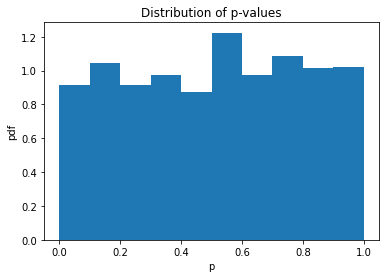

#### Test output (most suspect):

>Entropy = 7.999986 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 193.39, and randomly
>would exceed this value 99.84 percent of the times.
>
>Arithmetic mean value of data bytes is 127.5115 (127.5 = random).
>Monte Carlo value for Pi is 3.140233256 (error 0.04 percent).
>Serial correlation coefficient is -0.000624 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [17597583978150632564 10000921604300901035 12760412692169167391
  7534698808874659229  1770797236276189002  8863747898910337292
  2527901438542152748  9871508965076817761  4792759322334129464
 10427725554594631858  4109894750180077694  5968412020770986865
  6025049203284070299 16510865487303387993 13755474490014649373
 10312419302893560300  2912150607919283053 14070031748259367200
  1182403237961248872 15926643784951815999  4950115457819227044
 16779001525962672531  5595566308088600544  9906854712793294818
 16417286438747769496  2905529697591782676 11405501715770712769
  8856317038672066909  8137739050772501685  9059197621539787494
   915556741536539486  7144581170349081204  2780031243987813078
  6104789302934766978  9091371137318023616   665960716817661432
  4978574833481823435 17787246918190249031 15885325648698928563
  7938753130880218322 10628479586539339397 17799758520209333104
 16495106726204951339  8367441888726056093 12623020387076055627
  9204818923467527153 15626358260990341334  3271139846009075535
 13326538103468344715 14445716725295249199   471683758686723387
  1406829039632441699   208893146367955709  9887427851453191106
  7480241682005598880 17594138310701849678 14176408468676530062
  3602560232596182249  8767120563319725038 17488642125646801158
    53768482184166014 10600176970290504686 10401435779299086263
 16783636681343945018 12052186583325812535  4090536763149331255
 17013124381584302272  5585651237624770088   649594168398369744
  6114353686253379895 17994461653438365825   409540591445342516
  4817610298786233183  7747443606614092525 14022058912917366202
   814168452559721040 16703960275335731983 12662980249956863666
  4083511291875984607 14113408414527102746  9898484274245876686
  1998737403582149441 13214093169241241862 10466889811956325472
 13108366087646400979  1790551082173663190   994616157022731032
  4118569487553612347  6602608552700021740 11853780628882283642
  1980188546593331539  6251658946070890286 10245092582950757430
   137795815843258529 11491299620876394169  1660985575961394429
 10548534339793716922  7437987973497894162  4595702407361351862
 14279524769759191444 12995354463163158329 14753695922723224600
  1693813559725582681  3020999613411898082 13924738929703949702
  7765649515997290828  9944317513423843406 16146568131025982051
 11088226345207480654  1795209068050274642  3450346372772553159
 12695368185551342113 10929610448002134101 17268330553928263954
 16998547032351058206  1115084200532584681 16267772907052347311
 10706204691236648725 14859755392396895307 15875993637579495895
  3740030867565620783  4730431264579673216  4494635871913941098
  9893858685924811662  8600874428604095743  7934641675572993475
  4700900406837877552 17130465113473988762  6759876559905397927
  5585025548466905924  5416417532275605502  3586037823350226513
 15053755260165323719 13649311264911510876 12440418269427451617
  8630022353825507045   171171889375270505 10953733520755468687
 13174162388278455891  3152489956922971220 15195091666793319261
 14591757417106631869 17406071372528162562  3843825197828006308
 14666900142025983854   827112476686108639     4192543703904825
 11498456041064920882  3635639482131865779 16666124695819479284
  4658404048486352932  4153877023059596049 17941210509210453236
  7833721107192856555   754137344145134876  1493930190916402719
  8532140300156016321 13973758894591972608 10221256239426019774
 14024923733489229483 17663797631146206129 12612278964256147722
 11526179464902183571  5464825388013744709  4130704921941935023
 10257703816126669578 16160254057956411307  2549289997772674548
 11928549228681045161 11067492125896960042 10366990328355208619
  5658600380623835911  8421783083104074517 15873882063001155095
 16287609288637793327 16060286028207305029 14797880372524381870
  8664594179809307405 11298473623118082774 17575883389009044954
  8654993950164074998 15298188734255106419  7686088516060169748
  8797063236793220918  9056144993465590916 13580941709229707631
 15453039050813182645 14502144003316891466  1237593309817611126
  5009949816624113383 16359785453746032918  5731262924978939589
 13307496204481658059  5360265047789073981 10189002071070365787
 14210957654696781094 11934679376745165663 16103831747361217345
  3216538098740268981  1195813323206442410 12164030969123595518
  4537826819269682481  3239168121036901951 16903481714296980952
 16188677102678405818  5874372742146910849  5699581592966083275
  1105082694053326278  1073776223866211551 11623679842241137564
  5075210677336564451 15777829086688724378 14662869439913735550
 13263409707631449297  3705313717046987782  9324708157746113659
 17201747877919552109  4003649292082293588 13948859980584437203
 11616906663943996158  4709578452553421722 13612544710509269505
  4587322529345267156 15492757261670486233  2423171228519490683
 10468073110892164045 18429258386612966424    49914243874339756
  8065678800089034406  5399207586082841469  2332980897709158772
  5690904148226685935 13066015866682981941 17070180327164070290
 15148799802767554858 15833959688350532179 15746845528770028516
 15256326132881715141 17267110555532514038 11117857389831058911
  8605526747316901635  7345998032237631966 15460834127949142971
 17683952330775085849  8519591650426172504 10253515444441291815
   145698749812676119  5502216300550855595 13347791635224356900
 18166441840922567416 16541564279014170722  9823643464391429518
 12042016524936804364 16856176867355726904  4968505770304595644
 11366914802531243578   636659859089374242 10050008031679787101
  2736483201778935290  2942973084990274473  5607163053178845484
 13214746034730014355 14230172080015560841  3034524787713096175
 14186761970343677773 17744178978375850000 11496561535909110662
 11540700380525713794 14095321245278934995 12510768052449333178
  1726688025461966526 11307132655094745875 17515688804876351933
 10057226638803995084  5817121405490994140 17198948639269666724
 16824907736006115474  8528848303330259210 10600962185170969714
  6450050358475717779  1344389677552714685 14919761666465279361
  5200149872580760361 16438631812935765064  1440891522531717191
  6470203350755610763 15325372101001885518  5494347436706999121
 15960404878965640052   187680350494460387  9405399784801837683
    48695110763843853  7019473719329639765  8248542941659364254
  5279053929556870538 17244106134151838044 17432808140740129952
 11805231183780721134  4578464633928151747  1032080056725290476
  8103045790687904106  2812510002918566650  1304800797216899220
 16463373332988885580 13959670142522920111 12429867292934729217
 12758963089420138076 13854178803657832823 13593207518660445230
   894570719589139669   672340991885236151  2205106630599054947
  6895408268224094846  8464149014269251886    14065935940068429
  4899358265803120423 11643916766534728395  3006017410010964651
 18213477238614253889  9414246081593211417 12770051758298185702
 10013535421645985873   121232629508865215  6442226865604942477
  9479679230079158618 15196806412223615859 12640236723928556993
   501110206900699976  6939929626636309772  6537597743566616827
 16413479145627003282 12493733509228369053  5995948730285361577
  5277546369316264406 14629332795913616105  9402190568446045220
  5319940764659248681 16741907731928769099 17574454938101257051
  1820460653816269413  8264303613330754962 10907051615581898024
 11698456196448557312 18203940118184579879  3234205779257563458
 16347268603692819740  5832951357860472904   272559907002582019
  3758498482969534825  9147400111507582927  3411656466105847791
 16897133849022653439 15387183509607433959 18445437672010721176
 17908062784427062327 13968890781688573715  1013890968467899250
  3372272815245795701  1316861177430469357 12298330495663042386
  1436851154823439669 15414746504275352739 12599095432979967595
   360800240741984932  3767692735151911912 10210880053786385937
  2565962121454316003 12161387057357757056  5077848927238535457
  4762540362214008730  9686493797832344598 18065823041331509730
 13178644480858987758  7604903718166395179 11274008624460963518
  5858892637698239233  2082541613937533581 14851403232219327157
 15799037130470239513  2606761473828916313 17617388619220310340
 13928927590194527176  7433097313126395548  2457794979654190078
 15388956597647373793  6322192929468910855 11375576316650279866
  4901417232475576000   991743543187610803 14091208458286417034
  7909511992874819165  6137924934785144557 16469864511923884799
 14079568889824742131 14735590095683800402  5666871972024921724
  7130510429896068365  1340867585262850617  5293162701178448232
 10928534442729705330   121351992920238224 12798531816810536330
  5547044270162154102 12851574211160394341  8915029248828102849
 12596707154136462505 12274387187360127659   431291250967061611
    22226453832950545  4288627079530754874  3526330141022910547
  5872582317114586568 13866009438557631459  5241702881630254796
 11670009661809175615  7836984594874839884 12391331372960562216
  2408108082276010206 12069111648060103667  4454205501390652444
 14810938069821771046  9616127922723019674  9568167755483156796
 14795977546901108664  1556333902895137592 15598994132683774570
  5930188996219397551 14651499269792611459  1960070949050085915
  3556945059898979561 18035346081107831392 11779240427361586322
 17607696712114096050   136658624734411794 12906977837924795557
 16161374261978313829  5085706342021127974 15891161466668710279
  1101119059417945101  5927376616920915882  9304950475840788110
 15250480924355305933 16171913172629131430  7446970658542865770
  5470624366608651554 12894263145858013586 13294387855766608771
   364786826222068532  5031883695252620149 14056780390915872937
 11284581213771938501 16738932900608047511 13206107283445158730
 16537841158481794844  2534695014082546904 10836786783813191370
 13141511061862391206 12236492152499521180 17026229766554063535
  8979075156980008089 14104738937095180436 16304715672892044050
 11757734480281227997  9414852082036454632  8885571870609631919
  1015359398962179110 11567152925552317373  2168157152026655447
  8002768500943241632  7501850494498435345  5587361061720126445
  9390939484260718705 11181788217924585439  7939988357213729935
  7338963624010386928 15770886530316146207  1381342536209183225
  5841297197967194402 17751456186830986598 10286870873108711670
 11653723606565474520  8897070415075813882  2343109222530567708
 11477812439941402580 17795076092317589378  2246433091521432180
  3546903830408853540  9532025885395129980  5196139591210921651
  1456260288866705041  8419341471432170692 10465500277601815772
  1987706069340785485 12249983967212644425  7358456412162616563
  3751540867319683118  8264764197997453833 17181821232602718182
  3164292060404483609  9227530767122382882 11753590556285975906
 14856093235156508954  1987664614466192546  1012707504585789061
 11963214795525984686   938684855150652387 15629906440184249297
  4923624472665085958  2198551843700526238  1320349125608947818
 16723820268521180760  9800675959406738289  1150687348506485113
  7640668548908221087  2867381236013770645  2165662090743317353
 12311420918907477570  4972949952679368125  5562020499367124317
  3889482016404013048 13999612212602471360  5463995873031504787
   592443183119802883 14117425507685018144 14520378053715170932
   612541556319554780   823984019153508903 10019905001524419728
  4896068632655995982 14492651430776485405 15926236064273985013
 10024566908374359493  4571312408083561729  8341442433398440037
  9905420962598583323  2880862306549639473 17376684007099645646
 16367035159062684688  4194872679911546261  7227000650784067694
 15291507862539703645  2523436552485797391 18209792852489347391
 16003941866409149378  3935115652178676484 18189728513512035504
 15353168167370328200  7856026763213463993  7618742045088634423
  5907240924647833458  8345589383510940589 17068138834834104622
 18309137306854482392  5347014032816584167  9908267735126894344
  7619118546722734529  1943226925703969307 12050790578403905301
 16042981048325829062  1688098873549201379 11339871610546206507
 11712820090454242535 15229017530503950626  5249673211605190437
 12253522958521692368   879827071662923717 12339054185988431771
 15918124422227676682 10519455006753682434 11241177476800413767
 10039101910805958068  2137590843204617532 14158058847136642659
 18122932157476879137 10137320393062505648  1357504570426879068
 15298817734323219938 10290920712842435630  6902004128446631111
  1024481172700475024  7697538349515911706  5378082369065021005
  6438418798582659759 13817900106242418951  4824873058486347234
  8846466553371838012  1305103048565219283 12678211632537864512
 17881723951271741357 16938817128917866682 17196285539706463846
  9188208921414235145  4981946600651366899 11884609728147820850
  1934211607759286091  2332783660787068130 12714085679796079020
 11603864499672201278 11647268445366136425  7570676364395692698
 18240431321943059506  1880731858074964037  7301802799751597997
 13321483418118219580 16370378643249856298 10234024823441192651
 10549617873155576597    99482350948695899  9314010246863270727
 16471243368985961681  6549045501463458171 16558045458257704188
 11544594750334482349  5202046695023151568  6026456915462388398
 10525020029624908755  8351207174722467553 17012028012216715890
  4047922036324765653  4846068922913548208  1163328396847474537
 14186567256656417614 14265058721134175538 16601397184216339883
 16961916041615635325 13774679213101728889  2083750257649055654
 13339203677817017520   120168804625606344  5997161532044363833
 12743782486899902625   282066975409613361 12000983970798964284
  6344460248564032893  3745037006534085007  1124742872101269659
 11167024633670389597  3821899545929035538  6854762315930666058
  6575768035857727101 12042922634381490851 17824364756055335028
  7250368880049902288 15831445990682200555  5114109305968048329
  5587878489195439905 16840564517131229677 13393037699292490066
 12899473594460815378  8997641961336445705  5115954009193236102
  6672190177721947833  6187121244380380228 14089664553466676777
  2799622870640447326 14945901376843535765  3572939014908684135
 14179154933685809583  8120792933336695801 13586760756954162687
 13332223930027406745 16416203252143203537 15835205192773690716
 15237244811337242101  4810227062661682062 11483199043456716106
 12021128475370334256  6451088518551944682   549292000928155967
  7101176486273308513   828021591001532802  4810358796301152433
 16292658040754927921  9423103145931069546 11622894828787560584
  4745913773752970143  5288382678147563915  2375862918087263384
  8215874779018653769  5357398885421006621 14711578200932736385
  3453636271514681413 11555412687677175597  9605351319376175515
 16986383031475323954 15408728034974449036 12524339950095402499
 10195501845994523354 16299040351740086408   338621146716905998
 17631262009212350479  3180042023422344870  1880519938207347394
 15083623485393969134 15914329574558424962  1350837202688926651
 12076788609309481292 14407775992638408811 17545806839161452721
 10321595174931938115  7956440960519079995  5213646884247081620
  5990051651380410733  3438007937894817321  8275320045965813795
  5064669420884125220  4512919735975063190   541331602608911777
  1522960061213057075  6845222421627100082 14243253912764898850
  8517833244003138214  1962931571891797444   503456794339394882
  2131744952819171103  6335880814855530003  3535990444252077690
 11208182093839412014 15020319013210582653  3828672954192477062
  9556703510773556831 13545297628673744510 14275220066024646242
 10395106479584389546  5655960781362364647 13209935351052839194
 17838817252997529487  8854911975844490957 17395199584641513779
 15304769847840960221 14867436703762552016 10568157505677723797
  5489624210913426367  1549295560010975816  3259666739855367307
 10804166416966486010   734103294575460596 17080621235460987081
  2481878335097721503  3118708164086520393  1356461701204808390
  4786399187644806118 11696538875077928647 12197068547809535524
  3427322873623292281 12594860686073858257 16236397471689101717
  8454781514665396355 12217503787185231566 17199816930600752726
 11224800235641410040  6951345871128735642  2384175867555741109
 15102871744584727780  4481781367434889381 17095899334749049820
  6981378398052640237  4229204363635342217  9556081430547719380
 16385424161546425696  8663262578628816235 10705372707720279149
  8090928668839352174 13162428467229286703  6035741287479827823
  9248405958806918762 14220204713596495392  6371723346616965124
 13382507881536223467  4767891927373125878 16887167825072061307
 10320188363987723506  7018142606349706277  5185932973719085584
  3232046996826408911  6944204870431278338 13807168653774668428
  9964020025767292455 16576014571421375237  8535422012879624148
 12628075049589190643   141680299328116822 17565885313788834417
 15217880735779450308  3247874371075201856  5797170151313038643
  4571617676746853702  2780971960198991070  7553113930855221428
 11096780941628269308  7891147892848505422 17441863535699347166
   274002134230288314  4008398435150682585  7829699850546880003
 14989388367960256194 12647480437837141140 13430298161712811351
   824110041104431372 13718786806178194033 12908634943363303013
  6855557815918415178 10872385704147600727 17792497425579170383
  7316615879771689646 10070014561172060683  4505261153574225533
 17945292608044241442  8515323995777068854 15406583059693794523
 11636427291327783083  6953360467830522839   694216032643625646
  1585855518829841797  1283136311654670530 13653750995948427072
 15350739922573306862 10492703869524254790  1018678210027655934
  1175772402571773432 11292721214428067326  5630607556497088015
  5805885710296129520 16119049805554292568 10896622004190154093
 17354775021567120571 14290580353347482619    37158002517919599
 14285624999088487181  5534579463910725763  4529011373249051846
   881319150794257975 12355538956932854599 12847611299058428806
  2103431634572968252  9272466695455289174 11916597701692517260
  5983245871862108073  4472098749811254847 15187763688406249960
 18431534218552326739  8191071715487603736  6637736993433087825
 12661023903555733605  6908940545900587237   280924052254353896
  6465589516871822573 14790281862826325229  2112320009465502500
 16631605778952134792  6736394404846656541 10710077812245087923
  1893600056073537873  6601969406052640622  5101558366975657576
  4336062179902626824 17442052049061479548    61326943120262666
 11174285640969594358 15834243971383868052  3073086311901637373
 13668463747457567215  7101053047115024349 17327689693120611627
  8659941918255352986  9525904505691659758  7816144478964341319
  4998037181317750489  9811223772376845164  4324964142109859287
  1282843016154847139 13981324492815045084 12212318101163812707
 14248103940659547097 16647510398667136586  8140946988069375682
 13648274016417405231  3442506962701465018  7967274953423275705
   742150885297436612  9764500328074614893 13690901784641704548
  8025366029247069425 10633468959144509582  2411920544099949788
  3146166980837125415 14769884526571474387  2030514529529408003
 16709672055712682603 13647041564389666286  6218780001329865985
 16458555125259339137 18259161045311368310   437232950543876544
   473019454910605115 13078970320307960056  1963281379459232050
  3677079013815844803   927926769195875859 12883171898310758473
 11259754384056420038  4793775158061050476 17277843195036619798
  2312830841422690199 11099563420958879023 11302189747590848771
  2611638714767524520 17400433720062963367  3962503154114500759
   999806069862476557 13145718934771001210 14679880196333680355
 18017896244521245646  3038362938318228492 12747088523579594505
 15478461388929033811 17369502232956451411  2043866112328773684
  6334481476355718955 13619153502291160246 10058985370416200700
    44142895356647938  4174088955356872348  8161823917908623687
  1952528259255195537 13357691370326949096  5651648020708102133
 11715326123350098300 15183827159224725990 12049864390677154432
  9461745836479340421  5331060003750345566   590415103803744482
 14600891713978828367  2531698293798774287  8742888118096493543
  2182048165840096872  4547072593508839368  7650316801847142184
  4791638668236563295  7441989764013082778 11932529623214275399
 15697414687066279468 16460015523886889209  6612577525565177385
  3464307796515910990   344158456232941139   909434242780486217
  6408705088095033327  4766472263456737224 14366994661432628721
  9526247685290602773  8318823842947031445 11425810701777799880
 13364853321951667545  4828527647555278706  8004493222708851688
   880936317796852039  1763795551897444951 15862732185987289573
 15718568916791310299 18158814660989634253  6621077573084338695
 16625481800690623463  3690729817910002787  3497292046628219109
  4536600657707477538  9333336550462309468  6205671684978086615
 11754128280530206267 18117345584527861287  9759817274208467275
  8449340502660034884  6752052045563467468 11122758969235949319
 14218521555563680897  3832631304682694204  5895188374093886135
  5372341701718918988 14309338856369662762  5794211704870052334
  6493952291263684604  9593736745657768929 17338947799537626198
  2112440340836155842  3515023326968025998 16565791192544753499
  3853011292054683769 11671165367913532357   837904962684784111
 11423302785239928163  9032848323039648501    15943890914421451
  6640825605586237742   648173382324265654  6148521139653854254
 12296409491601460632 11381669562063450457 16162110445292024722
 12119608063741737462]
* limit: 10MB

100%|██████████| 1000/1000 [12:34<00:00,  1.33it/s]


## <span style='color:green'>IndependentSimulationNoDispersal</span>

#### Fisher’s combined Chi-squared:

* p-value: 0.7841347816931427
* statistic: 1950.0284824912965

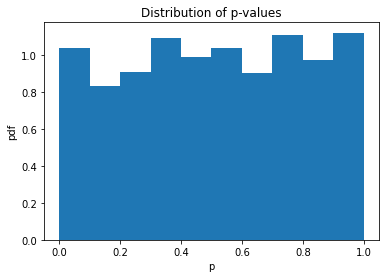

#### Test output (most suspect):

>Entropy = 7.999986 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 187.76, and randomly
>would exceed this value 99.94 percent of the times.
>
>Arithmetic mean value of data bytes is 127.4784 (127.5 = random).
>Monte Carlo value for Pi is 3.142376457 (error 0.02 percent).
>Serial correlation coefficient is -0.000006 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [14702892442688087677  7589347957205492266 16440988822882469705
  5651646620903609445  5659947327277823856 16167763664206986670
  6698704605756875374 17540465990710924622  2155377526246256175
  6886819459054454466  9662897053236052365  3659063500961122212
 16846866565478650702 18234121327714757293  2093798720305793779
  1509267134206788288  8271042925591259220 17649961875327437063
 11357195170572185988   589063574543700494 11155946114682494670
 18405679870962258224  3659669627204454021  7803066678304673953
 14340864124006831539 16708272459482700862  8264003992847063559
  6549555655330162893 13215313811549402669 16281630283822167582
 15468230328763715078  7715576827118850186  6883340942660832758
  7216650223681190456 14157283195067778649  4491040662819056922
   271482825660522555 14579316603767936238 11150505601055723771
 11517627466640603301  8105799242887370832  2162803622260149679
 14431847086068792025  1953001690824633646  9538348446280836490
  5757482611255615938  8694283627268491331 17595158531542617460
 12676623497461959537 16987740424712760913  6237080067600988103
  6084654190964103412  1263564593091243588  9191956282126805956
  2562781024435505158 10887722382958292949 13870064266344227568
  5757417899068326411 10173368123329513947  1789481440567959868
  4223722183278049264  9467379047609806861   918528682423488419
  9204123294347804107 14436951793164986963  4578482743798522821
 15235934810891083747  3815428764810203011 13868783801221721556
 10127133033540969616 17748571703897037164 12939651218958184844
 16342188564896300253  6860043116206477393 13671473097269880858
 11777331442479309741 14710958170586691888 11957485818843852035
 11665251018310048055 10041159622023176746   605823256989016080
  6407917836318805366  7734521934221150330 12471878338914315676
  9594482350433200623  1992153581489703618  4158341428772326356
  3286070686496202291 14024386311721339813 10759672898608698705
 17554864846891709201 10899368068887829987 11748260021605764713
 15321935790632395843 18045907445305258526 11788678879020447193
  9470329055868279247  5723528919746445810 15843145467057857192
  6289782953988983490 18431861445284343775 13185110499437771550
 16063785636403871858  1995199904154681208   243905853195200926
  7375957323898266915 11119349491296840594  7373360285999243715
 13499860279663894797    15975388475617233  3388373839282004109
 13966427724023354377 13258634668629070703 15355127762520646323
   374834021356095795  3748442774970766395 17057521327680285303
  7211703254718756784 10924641642936567990  7736618547684856562
  8933611879556571294 11489631854861754330  9259648102543938484
  4878210424935552648  4392436382667282607  6782438224937344174
 15958027375269108023 17897241755514867669  7501380360819565718
 13736834165636090741 14674313462918140198 10672051480961317298
  4768162389483985734 15332971492396346175 17425053503873778401
  7566466360682783958  9682852408600958975  7669472688406662590
  9280401740050326791 12201941321459735701  3197759667854669497
 14924188191414549270 11514538619296333423 11517854030447151737
  6224853239148788951  6904205152698679342 13894714880973273021
 12662942948616662620  9781152968493438979  5721491930801689249
  4121680933014802699   469746347560859385 12870249272719490314
  7168800435115376927 10344391630991181821  4999002111676179721
   551172696959238644 13151037068238605154 13331264834832491902
 17424673678732212986  7154512248482441393   188980060034982335
 15406965633659262644  7623317522788496907   125863938255393455
 15530471427529871305  7711241819255411604 16845491338437651855
  1150770512842454456  8358852096478695072 17908040439403965739
  3884315108365457361 12317340729806705890 11896344011627336882
  5043508629326677471  5287541406199968915   592909667590933184
  6983787076624069316  4631190613541657086  6856593176290848874
 13130505386518229518 11702167076394511616  8878460672651809936
 12043753079682381610 13747958061166512412  4430702113209540970
   158607705171235648  2149689225667326007 18234055344769500793
  9523547709824291999 13039173615525632486  1520805617936390847
 11281868839914316321 16657786133303746556  1972187885470751473
 14568693336248088978 12037966781310939219 16651456679228065691
 14898609159363746831  9032209889293719920  9949188890806748654
  8960882383851966322  3261736220701802628  4385287197310852924
 11845714416679452710  4933297724472637677  6808319986986256966
 12411176984111721814   364879690125697377    18164322739373822
 17879528445823823366   214069725623482028  7947977402482482873
 16498198190164072668  5247243947115082636 14191908549619613025
  1836044847974844501  3528476752422467612 13040336604392574101
  5701424829788001206  2670407371728944522  6668312202334586498
  3186491122352850350 11973343926334288126 14034382069494351582
  1474120306426714219  5405684298128580095 12606693611275427674
  6260842268507748583  5963179783701338542 10307481074444579814
 12723811881982639688  1826972597376973196  3366842229350103814
  9637107407683817774  4912312836347761899 17449628572308759485
  8695816303093126378   343644419986154347 12883969489462709999
  8060483272904524289 10423654420968799829 10063405920870938068
  6307300409830279652  4525230970565665996  4776503549877959337
 17783203187482763281 15982791989108619908  3595175114014328717
 12276274582326080651 12561997940628275379 12679493253982549224
 17327919461997425818  6303340047241920251  3119704561912131229
  9772175979784720234  4210455687199199241  6669782557468137296
  8107348501065560677  7803559068755330990  3913749283008562151
 17206022391351195069   157286095532651892 17452834277131557004
 16097082037383325925  9292351111285816691  2749609080204976110
 11744125217093181597 10707631976975014601  5412461834286202543
  5316946609585149791 13253255502187294645 17895073365453023261
  1214350529766191297  4076851500816689446 14709373456871376397
  5122798622039615855 16427720017635234731  7383355318404584710
 12548315925065416492 18002654144668049086  6383473433396183987
  7272315575214733207  3523252970095809482   236828142144052953
  3763322440107089091  5791828338044902202  4740028026136443335
  5786187011988786403  6521617090838359718  9205255381071838946
  9712168425682638351 14243681369199917104  3917397940504724865
 16390194069658390472 13135181827901046388  7560490164656096516
 17481549171136286948   520150754747853525  8698457655754223980
 16890984072670637996  3093278469591620697 12716961223698096099
 10409445204840343434 17914313465579454657 10390375562010724382
 14527441402015744501 12240156565117863112  9528738791963676697
  9626928021358069881  2960136164810440414 10498384139121811135
 18008610356949598671 18068857704165263934   677258078546402634
 16833074777847789455   554517653343468153  6195362192907929768
  6400024606603308474 17626240470860905206 13008467788414319620
 14159527439444519467 17252067481197640395 15085777046982850277
 16635273491808281581 14758581077082959130 17045390694727809520
  9713915140467317205  9876040696228288728  5625613123466230006
  5556897173550260349 15869652760014286861 15095865634176164393
 17079705499398708197  4242088729639211439 15812363471927690362
 10972062185727979573 13649075290241347891 15729334704665822323
  8889058075837922605  5622654563839700836 13331634748753785302
   769040158210856037  4347324774403308477 13195848065081965890
  5124138823454638721  1418149930975090199  9263059218452689278
  4968566964918259713  1583036008856071906  2639815277185081031
  7774706879641961268  9028313802857621372  8796105472562406829
 11927057819619573911 15037134169389595866  2666119317863761578
  4991510071757364603  2320429785491443091  2206480295420526707
  9392901770093502583  3060001544678613784  4214824273036763765
  5107579080096554958 12075541852627252841  3361506545267523464
  1030431662804605958  8073755001606316082 11101073134685427958
 13615603911404993229   821860187713858627 16133426755551563289
  3571611396883622882  8695082467867144959 11262190629584510672
 16306826427424354542  6186902033454920026  3269795787532302177
  5260334872144188511 15314464186880349443  9298398472933341347
  6739512827265537026 15426675443228303691  5833059287810673597
  3015221414401191545 10665954284025528660 11720238439745552114
  1165914559288949704 18277635320215818326  3636490772419648625
  7666344047751280049 15636217096952704103 15797346077944821406
 10412431130284002751 14763818469259071242 15629851314371287957
  5403337900465739926 12782289097139581876 17268775768605061746
  1388369664097157242 10645949773559168493  6625593663187453393
 16654472576359445928  6422359242522854351  7680169561768886825
  9363770881932840761 14792806330022459955   960151226332662482
  1256278841850373936 14739624924583736075 18144198828896116590
 17274688278905158115 13518911801832386501 16384641437398273260
  9001026629115051196 11036251554072203575 16480884348343216202
  3974356226068581851 15409137342579601639  8044811029417744494
 11714307772120165836  8135518804825908632 11783250324860886892
  9671999835857554658  6821705578251626261  1993086104988851335
 17267239931335716911 16729177401097310334  5084240114154056120
  3884618874672704249 10368144928772251591 14909338433699844053
 16500473322880670579 16174922690096217645 13229125412605340143
  6067787995052443629 12150259764275281119 10853649888407484432
 15590269036840556690  8592826798346140175  5622462877095315402
 15224935510503868191  9500573197602206811  1695006669836713054
 10834744185143434434  7084598978572578733  2987939175457328039
  6307153239697545208  2997774909970553696  2306165071723814943
  6393271955107385412 12193788322019124065 10868082649255857809
 15842314192084883912  8476203684042684484  2358009174597332199
 12741738863852780632  5242852827273254436 10457102026067052936
  3699049739226506853  7413500819605023788 14923276213687246149
   522532468836026367 17213446424397813807  2004758529945360413
 13580553301687952149 13673260688248208914 15323114830312438841
  7880874390082675323 16134196295662043323 11664897512478286729
 11831921068841307759  3154083043496078298  1189044693878453994
 17874712539840759804  9695419732925582447  7553755017188887262
 14222830161471847327  7184876590352916019  5964655195041371545
   794837912859957502   121779721321151062   957928457355657188
 11435096701247152484  1990182568943965012  3129245950958280931
 14395093061152766974 14360159138683338339  5796234936116223717
 17704289949419090977   957843754398206678 11052139090371149575
  4777042309631979967 17957424884840216666 12047758048195604628
  3259180133489497891 10862780000089216816 15396277606647612306
  8212938366686978762 13305186855755516799  8959740316523793924
 17552505653028062866 11424881707483940518  4699390598171930632
 13472323266698970016 14081472929733947545 13667068125863350957
  8755710132694156692 15371923982359742787  2250174466554335867
  5286660008122859537  7930590811309755510 16159110388404723523
 17404858729688792510 10970967327749295485  7420056830206883824
  3481465452670102373 10195441515908237224  9625668044413973934
  2550491442977259333  2615202352777492161 14336959082610447117
   215014181997690743  3797514685942616158  4709274883617367943
  9986385897248185800 10851542416209534237 12358088144753198699
  6504001807907189955 14815418396952385291 12501114941170228394
 18086533352639038821  2638376323927438826 12023394179625863763
 17430905755048966116 14118010261249425369  8394720793437807114
 11332202818123096304 18207760050818900574  6071879903410940288
  2909757487068432222  8956223568220919156 13704350685412815180
 14548184541670791694 17346479045647075604  1418971349523964340
   997539860677285548 10203645854895485373  2331530227201596390
  9117433074385453693 10605595854036261139  4771077890338457166
  6276992980817009625  9545169822479163201 10637984796321420933
  4022242334309642005  5499051446865287777 15471380221046631548
  7408647901419200898  3618921209498030266  9704725453774015926
  2395132035931961016   762699611948286218 14582599962508324058
 14117835196178928062  4459041602097876231 16626332122479038069
 18270393669113251681 13891737279466067381   642070629258359800
 14985192268554798271 17393468439713507125 18396932330726699659
 15742988217635466673 16977915408551540119 11456889506171318672
 16765720345880683721 14637818979288895229  6311308256596373699
  5617318734280386808  3984759177676419477  4193013637027217757
  7745184572912995403 13479097862466752758  1590581324821027875
 16282793484803742689  4753087135275461324  7759952336416419942
  5404511148587779216   902769211960480336  8942597288136698404
 18359356437704417249  6762215551564664364 12061361115576499292
  5547590470851473171 11482408200924305241 17228965764092108059
  6818569522884347080 17241029183357488133  9895284525674738184
  9876106303207828696 10932078897727408590  5708928907411185284
  6521573814685371602  9303902913859481952  6497854824502827233
 13254837221120529732  9704617176425081381  5502665846599676583
 15660272129721566441  8687618575523605068 10680796588541391003
 18427596196379313750 12203165402686841273 12842663242166137526
 16328153857938224474  7484078780798401329 14282480829160061122
 14725482662191237357  2993243917270892176  6228471640615037300
  2293807328843363057  9202551946168502413 13443797762940937574
  7786321523224630815 14107116150489187104 15188574977483154412
 16835388356765425624  8984479491826498138 10076860870072649716
 12899897847759088198  9087181901821567804 17267757075104420927
 15738944049598758697   667449510718316631 17279360535145158765
 16130942828578009806 10317330751538904559  1155742065531689911
  6882842649230754320 14111237970298305880  6782899399336089529
  8372605473695081193  6386837415955278746 14308673963633142267
 18282047808346480101  5357007310916808036 15907328146075388729
  5844983749563811681  1512601265946022036  5687639540753677382
 18083639347173700110  3928451313114121811 17725189752508262480
 16601460882440051854  2971878936262470363 16642061683676814643
  5378720559023550802  3588292785681013586 16034942193282709789
 14209500598698440872  9499971307341060532  3399500787619712690
 13692915519385053007 15962674133713929194  8979542101581108621
  5504559212314990597   304021014418789288 10112329562803517084
 16121346516983894538  7237745822445688420  6965328611201267878
 13726933164434275994  6134722592397989813 17332926698840428777
 16776493244541175891 17562379891573627067 15901986387428551197
 11613702166400919316 15308339198256061121  4783420182603583278
 18002688776319797248  8017868701916652765  6700780816775634887
  7872565417761098741 11797633142700646065 17924174614666016473
 14650343265376268253  1075451123311928437 16658448444890284287
 14733573942829490248  2423493389739101127  1315266005199454973
  6484759835034899705 15438138952417879424  2836118750597599879
  6194541886173766787  4341623122918925244 14278865962726296502
 14658375885539425608 18141911109801285818  3095104681756800785
 17478416462804551385  5519799405656422801  2178427089965438180
  2877161466608831592   350900784121007117 12398027506187905322
  7255812737875623920  2434960701642790643 16872532722719361099
  9916179816771860621 13905955060265619643 10090492193134935774
 17628590759875816333  5845699382140390923 12540721618810886481
 13161830547593962874  8326891323971025663 15697015378175395566
  5672068443901784490  6084796080513470517  2823348606427438171
  5242386052726780636 17685916046977720213 13449667996424231441
 14121981222177611188  7396484396896091494  5258944173287698379
  8764084822656377260 13036977145958092017 15873035635044081900
  8307937374389613176 13499625264217599788 14320048421600668250
  5120581540578923055  7517958555036534884   936698511298286949
  6509279467514322865  7784005794244995144  7113751275860217466
  5695249279356989191  5920653078254262324 14261064490357345354
  7511726665329252997 16838137710120916675 10405180912485689849
  6723603104927805571 15130721160016447074  4987235731343073090
  4766167757910457721 16077789642537944169  8001878030923138872
 15264051828281479525  7846792931922132155 10589536931771138151
  4686820252302060562   578156703951359788  7987606363665623429
  8650702755731422958  3355913194491130050 11087423994187729097
  8095879364883585138 12074241212211860668 10700503866778497931
 12207863858934791889  3586658380665636919  2119398848624179628
 13603466408979318174 15990611062258738332  7281125598344434719
 14075506932369341865 13159375856886013188  1599097458905041470
  6030098488854976879  1095935693037308014 12608516645628228841
  8690959307413182560  1717857730251649911 17088189340743498467
 11684090822527849143  8473337539644044513 16477793404925573867
  3182825114235100084  3172816869901319444 17271048449425679723
 17975509317666080405  4875763798414727189 10170191067613265347
 17343770056185235457   276111917819279606    31467155452401902
 11776389454359658047 12382228671366023752 12945680156864324972
 13040095003324018086  8423709981724874196  5849174436935860024
  2819583491001664102 11654840595162767189 13013790999295195528
  8724681010778632425  1139718944905911230 13785925206320713348
 12700920608329301054  7038329926482292153  4471549853924468929
  7168920491242225350 17319204148490988796 17864048855296495984
  4208911881559373846 15061196822563228050  1239027391078904480
  7537919778375357836 16001471789412987944  8321945849642267698
  3965451230737951873 17083276633980770129 14873213439554976365
  8674118601822419329 12188695299719465536  9105156954664114346
  4951776157884127347 11548353899767350576  8048814739891848819
 16438184444852930530  4012800586994834449 17313855857689247247
 13130083591239643831  4755862419494231936 15839913374158439224
 17554336847000621750  4335536334685869290   264275305987294704
 15377275843863913554 18234620114418787001  5495972849877161979
 12945064938066756649 14074450261569768113 13150815072279164539
 18214511670908796334 16968221980108776572   455996614223180788
  1050610089152929848  8230337673365969846  1608554213640041256
  2639959992905980632 17448437024388907784  2923039757727473206
  4695262788017807909  7594189419411032942  6549900465627188629
  2795866966965012603  9923003022658924284   270984575540616313
 11744225138743393451  7249955973509013868  2398425438804172607
  1990345372935030653 17932236443067598229  5291932850358764506
 18224470895557539263 17176039619974139420 11922415135934788372
  8794091336109559558 17378048757299046651 11714493488395348572
 11658983532740777336  7521456694570560357  1362982528908530314
 15290760269196897838 17674154926587838054  8992303125228533244
  9190269943937955277 17985146130247724061 13073007498274880003
 18188282241004865994  8324145460877775413  2670615040955575796
  8785986394925410341  1267694768044092442  4415717154989104065
 17997838208118579737  6761888551184107446 12720808398665607895
    19159615486665283 15572527501554432863  8158890226809734510
  9046357450861099201  8687677503467142005 10111140306405098530
 17453636214920468413 14124825496433678816 16034224392501738240
 15054518298735526329  2808164867837825356  9950794090708964517
    58504660684090862 13190687988798194627  2370661995249691696
  3361969816403807376  9383470371943771660  2091443966125380122
 11919300131396046094  5158575709153783494 10778631431765941143
  6679008003308278844 18111775304383640030  4271126159475217796
   910315119032440703  1977515267733773486 18440339629174922003
  3297829037188252819  3890601177972355339  4403994354517294948
 11780946912533005354  3853145330208457595 15082590122865103934
 12142453485573447312  3021846737261993234  7720182387173426734
 15928580251387365098 16118482170526709741 17530372506985295206
 13206957975130158454  6768666099942887064 11512223630280550965
   478213167492696781  5373359354185518554 15305046940157208639
 17355194401836016204  3247718705650250196  5801411198055338191
  7405827721425686270 18005750476984631258 15733582534170832063
  8408710004267818710  6286805233051020824 13522990872304833401
 15639428578389344431 11009182980521167246 13375415863562899637
 18338758754081365733  3166430669145034584 14359879133484782941
  9992084057042765925 16582919083900737142 11432281621055772631
  4081982830214658203 10313312408680479820  6657398045808979627
   833164520851362553  8719079072352306434 10481285786795564953
 14813580088669391086 17341498228546105137 10236938967078277401
 10841643871216237542 17225983611612545318  1722700782562792830
  8176257294130744132  5479002401969500326 17317537691961776606
  7236868542254586883 14775881560027761651 13990637115112661054
  1980776122881314958 16893611078862443348  9564271310590239753
 13232008043189649837 17290959081464113684 17727649083149333611
  6087928664565731666  8563653108430351242  1925876446322407769
  7698612610019756036  5002907641047021878 15192535087863110058
 16806920501216944665  7507507936477083441  5121344975989874196
  2400376951131498854  6193027086086699923  9057150136323161909
 17583224055662093458  9682053216519546068 15991688831997832652
  1374984945019567911  4636332232736664147  7522405323116307799
  4215307194187357582  6595891103811092390 17603166041584371043
  1649645875046611129  1571997159999573411 15411691793224229969
  1824233947855838447  3274540091166319784 13489038210407225119
 11626092696927663391]
* limit: 10MB

In [4]:
for mode in ["Monolithic", "Independent", "IndependentSimulation", "IndependentSimulationNoDispersal"]:
    seeds = np.random.randint(0, np.iinfo("uint64").max, dtype="uint64", size=1000)
    
    test_randomness_ent(mode, seeds=seeds, limit='10MB')